In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
#Visualisations 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

Questions to answer 

- How is is the honey production in the USA developing 
- What production levels can be expected in the future based on linear regression 
- If I want to produce honey, where should I do this to be most profitable?


Steps to be taken to analyse the data

- Explore 
- Clean 
- Categorise states by region 
- Categorise by environment (landlocked or coastal)

- Check fluctuation in production by state/region 
- Check Landlocked vs coastal
- Perform linear regression
    - For top 5 highest producing states 
    - For top 5 least producing states 
    - Per region 
    - East coast/Central/Westcoast

- Visualisations through Tableau 


Comparing agains other data sets 

- Climate 
- Pollution 
- US Honey consumption 


**Import the DataFrames**

In [2]:
df = pd.read_csv('honeyproduction.csv')

In [3]:
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [4]:
df['state'].value_counts()

AL    15
SD    15
NJ    15
NM    15
NY    15
NC    15
ND    15
OH    15
OR    15
PA    15
TN    15
MT    15
TX    15
UT    15
VT    15
VA    15
WA    15
WV    15
WI    15
WY    15
AZ    15
NE    15
MO    15
IN    15
AR    15
CA    15
CO    15
FL    15
GA    15
HI    15
ID    15
IL    15
IA    15
KS    15
KY    15
LA    15
ME    15
MI    15
MN    15
MS    15
NV    11
OK     6
MD     6
SC     3
Name: state, dtype: int64

In [5]:
df['state'].nunique()

44

In [6]:
df.isnull().sum().sum()

0

In [7]:
North = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
Midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MS', 'NE', 'ND', 'OH', 'SD', 'WI', 'MO']
South = ['AL', 'AR', 'DE', 'DC', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']
West = ['AZ', 'CO', 'UT', 'NV', 'ID', 'MT', 'WY', 'CA', 'WA', 'OG', 'HI', 'AK']

In [8]:
df['region'] = ''

In [52]:
def Region(df):
    r = []
    North = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT', 'OR']
    Midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MS', 'NE', 'ND', 'OH', 'SD', 'WI', 'MO']
    South = ['AL', 'AR', 'DE', 'DC', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'NM', 'SC', 'TN', 'TX', 'VA', 'WV']
    West = ['AZ', 'CO', 'UT', 'NV', 'ID', 'MT', 'WY', 'CA', 'WA', 'OG', 'HI', 'AK']
    for i in df['state']:
        if i in North:
            r.append("North") 
        elif i in Midwest:
            r.append('Midwest')
        elif i in South:
            r.append('South')
        elif i in West:
            r.append('West')
        else:
            r.append('NA')
    return r

In [53]:
df['region'] = Region(df)
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,region
0,AL,"16,000.00",71,"1,136,000.00","159,000.00",0.72,"818,000.00",1998,South
1,AZ,"55,000.00",60,"3,300,000.00","1,485,000.00",0.64,"2,112,000.00",1998,West
2,AR,"53,000.00",65,"3,445,000.00","1,688,000.00",0.59,"2,033,000.00",1998,South
3,CA,"450,000.00",83,"37,350,000.00","12,326,000.00",0.62,"23,157,000.00",1998,West
4,CO,"27,000.00",72,"1,944,000.00","1,594,000.00",0.70,"1,361,000.00",1998,West
...,...,...,...,...,...,...,...,...,...
621,VA,"4,000.00",41,"164,000.00","23,000.00",3.77,"618,000.00",2012,South
622,WA,"62,000.00",41,"2,542,000.00","1,017,000.00",2.38,"6,050,000.00",2012,West
623,WV,"6,000.00",48,"288,000.00","95,000.00",2.91,"838,000.00",2012,South
624,WI,"60,000.00",69,"4,140,000.00","1,863,000.00",2.05,"8,487,000.00",2012,Midwest


In [54]:
df.isna().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
region         0
dtype: int64

In [55]:
df.sample(50)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,region
431,GA,"65,000.00",71,"4,615,000.00","369,000.00",1.52,"7,015,000.00",2008,South
317,ME,"8,000.00",26,"208,000.00","193,000.00",1.66,"345,000.00",2005,North
306,CO,"28,000.00",70,"1,960,000.00","902,000.00",0.97,"1,901,000.00",2005,West
27,NC,"8,000.00",59,"472,000.00","151,000.00",1.38,"651,000.00",1998,South
287,NC,"9,000.00",40,"360,000.00","72,000.00",1.93,"695,000.00",2004,South
574,OR,"60,000.00",34,"2,040,000.00","755,000.00",1.68,"3,427,000.00",2011,North
28,ND,"230,000.00",128,"29,440,000.00","8,832,000.00",0.63,"18,547,000.00",1998,Midwest
511,FL,"200,000.00",69,"13,800,000.00","1,794,000.00",1.56,"21,528,000.00",2010,South
510,CO,"34,000.00",56,"1,904,000.00","533,000.00",1.52,"2,894,000.00",2010,West
89,CA,"440,000.00",70,"30,800,000.00","11,396,000.00",0.59,"18,172,000.00",2000,West


In [56]:
df['region'].value_counts()

South      195
Midwest    195
West       146
North       90
Name: region, dtype: int64

In [57]:
df.to_csv('bees.csv')

**Lets do some visualisations** 

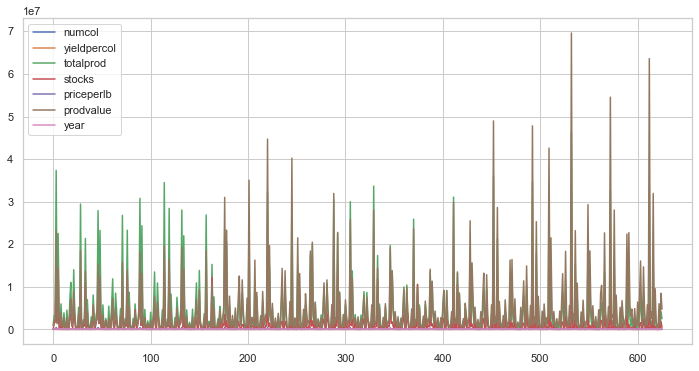

In [58]:

lines = df.plot.line()

/Users/samledeboer/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='totalprod'>

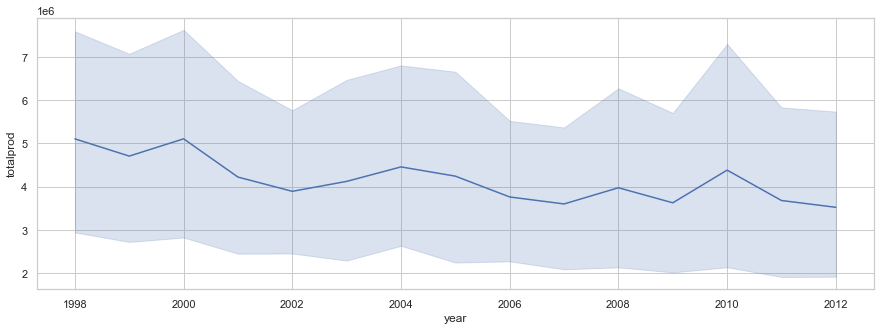

In [59]:
plt.figure(figsize=(15,5))
sns.lineplot('year','totalprod',data = df)

<AxesSubplot:xlabel='year', ylabel='Count'>

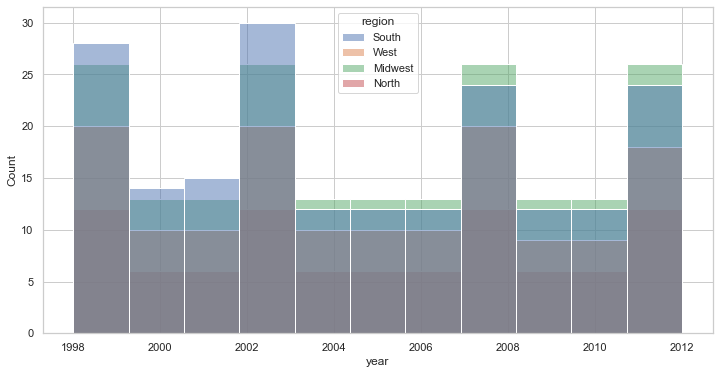

In [60]:
sns.histplot(data=df, x="year", hue="region")

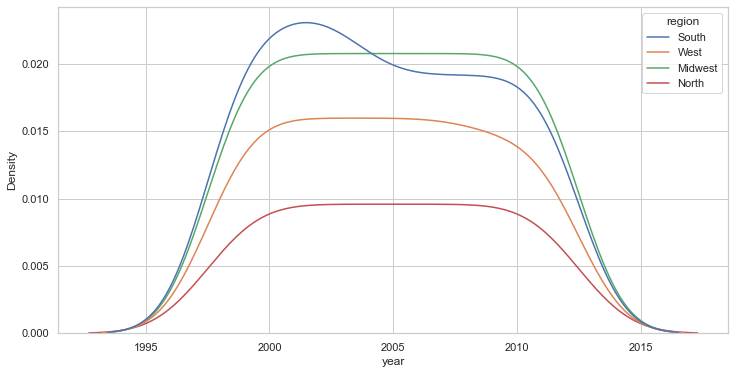

In [61]:
sns.kdeplot(x=df.year, hue=df.region);